In [1]:
import nltk

In [2]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
import pandas as pd
#import pandas_profiling
import re
from nltk.corpus  import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from wordcloud  import WordCloud
from textwrap import wrap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from PIL import Image

In [4]:
data=pd.read_csv("/content/nltkinput.csv")

In [5]:
df=data.copy()


In [6]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [7]:
df.duplicated().value_counts()


False    5836
True        6
dtype: int64

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [80]:
unique_data,counts_data=np.unique(df['Sentiment'],return_counts=True)

In [81]:
print(unique_data,counts_data)

['negative' 'neutral' 'positive'] [ 860 3130 1852]


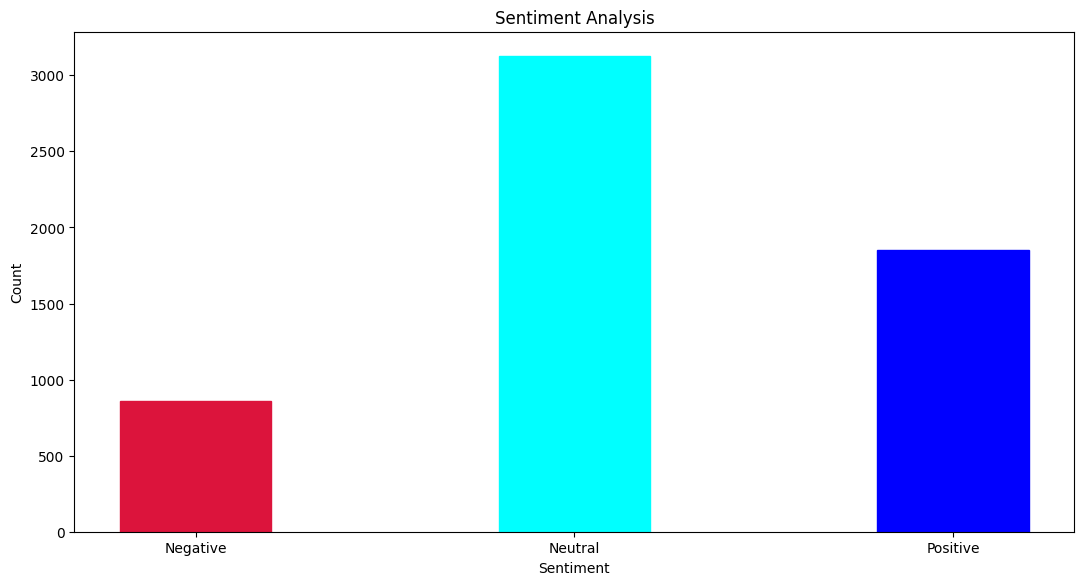

In [91]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
ax=fig.add_axes([0,0,1,1])
u_data=['Negative','Neutral','Positive'] 
c_data=[860,3130,1852]
graph=ax.bar(u_data, c_data, color ='#4949FF',width = 0.4)
graph[0].set_color('#DC143C')
graph[1].set_color('#00FFFF')
graph[2].set_color('#0000FF')
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Analysis")
plt.show()

In [10]:
df.head()


,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [11]:
df.shape


(5842, 2)

In [12]:
#preprocessing
# defininig a fuction which takes a column of sentences and does preprocessing of texts of sentences
def cleaning(df1):
    lowered=df1.lower()    # lowering the sentences 
    removed=re.sub(r'[^a-z]',' ',lowered)  # replacing the non alphabets with space 
    splitted=removed.split(' ')   # splitting the sentences by spaces
    df1= [WordNetLemmatizer().lemmatize(word) for word in splitted if word not in stopwords.words('english')]  # lemmatizing and removing stopwords from list
    df1=' '.join(df1) # joining back the words of list
    return(df1) # returning the cleaned words


In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
df['Sentence']=df['Sentence'].apply(cleaning)


In [16]:
df.head()

,Sentence,Sentiment
0,geosolutions technology leverage benefon gps ...,positive
1,esi low bk real possibility,negative
2,last quarter componenta net sale doubl...,positive
3,according finnish russian chamber commerce m...,neutral
4,swedish buyout firm sold remaining percen...,neutral


In [17]:
df.shape


(5842, 2)

In [18]:
# joining all the sentences.
corpus=' '.join(df['Sentence'])


In [19]:
# generating word cloud
word_cloud=WordCloud().generate(corpus)


In [20]:
img=word_cloud.to_image()


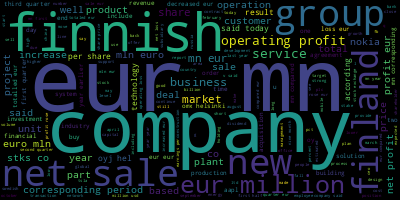

In [21]:
img

In [22]:
# we can observe some words like company, group , finland, finnish, etc. most frequent


In [24]:
## for count vectorizer
# cv=CountVectorizer(analyzer='word')
# data=cv.fit_transform(df['Sentence'])
# df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
# # df_dtm.index=df['Sentence']
# we are going to use tfidf vectorizer to verctorize the text data


In [31]:
# for tfidf vectorizer
tfidf=TfidfVectorizer()
data=tfidf.fit_transform(df['Sentence'])
df_dtm = pd.DataFrame(data.toarray(), columns=tfidf.get_feature_names_out())


In [27]:
data

<5842x9297 sparse matrix of type '<class 'numpy.float64'>'
	with 62610 stored elements in Compressed Sparse Row format>

In [32]:
df_dtm.head()

,aa,aal,aaland,aalto,aaltonen,aapl,aaron,aava,aazhang,ab,...,zone,zoo,zp,zsl,zte,zu,zurich,zwe,zwhthsvfsf,zy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df_dtm.shape


(5842, 9297)

In [34]:
df.shape


(5842, 2)

In [35]:
df.index


RangeIndex(start=0, stop=5842, step=1)

In [36]:
df_dtm["Sentiment"]=df['Sentiment']


In [37]:
le=LabelEncoder()
df_dtm['Sentiment']=le.fit_transform(df_dtm['Sentiment'])

In [38]:
df_dtm.head()


,aa,aal,aaland,aalto,aaltonen,aapl,aaron,aava,aazhang,ab,...,zoo,zp,zsl,zte,zu,zurich,zwe,zwhthsvfsf,zy,Sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [39]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))


In [40]:
le_name_mapping #to know about how the mapping is done while label encoding


{'negative': 0, 'neutral': 1, 'positive': 2}

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df_dtm.drop('Sentiment',axis=1),df_dtm['Sentiment'],test_size=0.1,stratify=df_dtm['Sentiment'])

In [42]:
X_train.head()

,aa,aal,aaland,aalto,aaltonen,aapl,aaron,aava,aazhang,ab,...,zone,zoo,zp,zsl,zte,zu,zurich,zwe,zwhthsvfsf,zy
1441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
X_test


,aa,aal,aaland,aalto,aaltonen,aapl,aaron,aava,aazhang,ab,...,zone,zoo,zp,zsl,zte,zu,zurich,zwe,zwhthsvfsf,zy
1696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
from sklearn.decomposition import PCA

In [45]:
# converting into 3000 columns
pca=PCA(n_components=3000)

In [46]:
X_train=pca.fit_transform(X_train)

In [47]:
X_train.shape


(5257, 3000)

In [48]:
X_test=pca.transform(X_test) # transforming test data along with train data

In [50]:
svc=SVC(kernel='linear')  #support vector machine

In [51]:
svc.fit(X_train,y_train)


SVC(kernel='linear')

In [52]:
SVC(kernel='linear')


SVC(kernel='linear')

In [53]:
y_pred=svc.predict(X_test)

In [60]:
#output

In [59]:
y_pred

array([1, 1, 1, 2, 0, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1,
       1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1,
       2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1,

In [86]:
import numpy as np
unique,counts=np.unique(y_pred,return_counts=True)

In [87]:
counts

array([ 20, 423, 142])

In [88]:
unique

array([0, 1, 2])

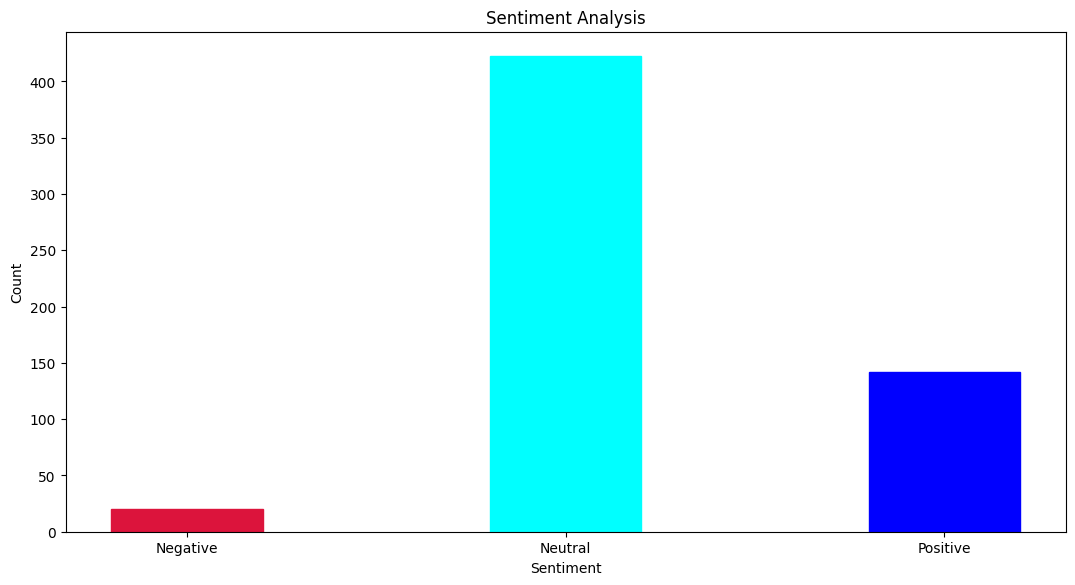

In [90]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
ax=fig.add_axes([0,0,1,1])
u=['Negative','Neutral','Positive'] 
c=[20,423,142]
g=ax.bar(u, c, color ='blue',width = 0.4)
g[0].set_color('#DC143C')
g[1].set_color('#00FFFF')
g[2].set_color('#0000FF')
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Analysis")
plt.show()


In [55]:
confusion_matrix(y_test,y_pred)


array([[ 12,  58,  16],
       [  5, 296,  12],
       [  3,  69, 114]])

In [56]:
from sklearn.metrics import roc_auc_score


In [57]:
svc.score(X_test,y_test)


0.7213675213675214